<a href="https://colab.research.google.com/github/12357David19/D3-project/blob/master/Colab's_New_Code_Editor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np


In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [13]:
x_train.shape

(60000, 28, 28)

In [7]:
model.fit(x_train,y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2575 - acc: 0.9250
Epoch 2/3
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1040 - acc: 0.9681
Epoch 3/3
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0712 - acc: 0.9778


In [9]:
val_loss, val_acc = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.0918 - acc: 0.9743


In [14]:
print("loss:",val_loss)

loss: 0.0918104016840225


In [16]:
predictions = model.predict(x_test)
print(predictions[50])
print(np.argmax(predictions[50]))


[2.4611240e-06 6.4965211e-10 5.1868758e-09 7.5348359e-09 4.0772576e-08
 5.4624996e-07 9.9999690e-01 9.2509715e-11 2.7083622e-08 6.5159922e-10]
6


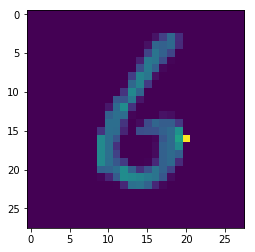

In [19]:
import matplotlib.pyplot as plt
plt.imshow(x_test[50])
plt.show()


In [0]:
head_model = tf.keras.models.Sequential()
head_model.add(tf.keras.layers.Flatten(input_shape=(32,32,1)))
head_model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
head_model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
head_model.add(tf.keras.layers.Dense(2,activation=tf.nn.softmax))
head_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Upload the MRBRain data

In [0]:
x_test1_orig = np.load("/content/mrbraintestx.npy")
y_test1 = np.load("/content/mrbraintesty.npy")
x_train1 = np.load("/content/mrbraintrainx.npy")
y_train1 = np.load("/content/mrbraintrainy.npy")

x_train1 = tf.keras.utils.normalize(x_train1, axis=1)
x_test1 = tf.keras.utils.normalize(x_test1, axis=1)


x_test1=x_test1_orig[:,:,:,np.newaxis]

In [93]:
x_train1=x_train1[:,:,:,np.newaxis]
x_train1.shape

(780, 32, 32, 1)

In [94]:
from keras.preprocessing.image import ImageDataGenerator


datagen=ImageDataGenerator(horizontal_flip=True)
head_model.fit_generator(datagen.flow(x_train1,y_train1, batch_size=1000),steps_per_epoch=40,epochs=10)

Epoch 1/10
40/40 [==============================] - 4s 99ms/step - loss: 0.0539 - acc: 0.9881
Epoch 2/10
40/40 [==============================] - 4s 101ms/step - loss: 0.0528 - acc: 0.9887
Epoch 3/10
40/40 [==============================] - 4s 101ms/step - loss: 0.0467 - acc: 0.9912
Epoch 4/10
40/40 [==============================] - 4s 101ms/step - loss: 0.0458 - acc: 0.9915
Epoch 5/10
40/40 [==============================] - 4s 101ms/step - loss: 0.0463 - acc: 0.9912
Epoch 6/10
40/40 [==============================] - 4s 101ms/step - loss: 0.7731 - acc: 0.6988
Epoch 7/10
40/40 [==============================] - 4s 101ms/step - loss: 0.5025 - acc: 0.7369
Epoch 8/10
40/40 [==============================] - 4s 101ms/step - loss: 0.4052 - acc: 0.8087
Epoch 9/10
40/40 [==============================] - 4s 101ms/step - loss: 0.3110 - acc: 0.8631
Epoch 10/10
40/40 [==============================] - 4s 101ms/step - loss: 0.2729 - acc: 0.8846


In [0]:
#head_model.fit(x_train1,y_train1, epochs=100)

In [96]:
val_loss1, val_acc1 = head_model.evaluate(x_test1,y_test1)

20/20 [==============================] - 0s 73us/sample - loss: 2.9353 - acc: 0.6500


In [97]:
predictions = head_model.predict(x_test1)
print(predictions[10])
print(np.argmax(predictions[10]))
print(y_test1[10])

[1.2858948e-06 9.9999869e-01]
1
0.0


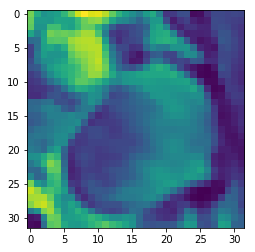

In [99]:
import matplotlib.pyplot as plt
plt.imshow(x_test1_orig[10])
plt.show()
